# DAY 24 元组和OS模块

## 元组

元组的特点：
1. 有序，可以重复，这一点和列表一样
2. 元组中的元素不能修改，这一点非常重要，深度学习场景中很多参数、形状定义好了确保后续不能被修改。


很多流行的 ML/DL 库（如 TensorFlow, PyTorch, NumPy）在其 API 中都广泛使用了元组来表示形状、配置等。

可以看到，元组最重要的功能是在列表之上，增加了不可修改这个需求


### 元组的创建

In [1]:
my_tuple1 = (1, 2, 3)
my_tuple2 = ('a', 'b', 'c')
my_tuple3 = (1, 'hello', 3.14, [4, 5]) # 可以包含不同类型的元素
print(my_tuple1)
print(my_tuple2)
print(my_tuple3)

(1, 2, 3)
('a', 'b', 'c')
(1, 'hello', 3.14, [4, 5])


In [2]:
# 可以省略括号
my_tuple4 = 10, 20, 'thirty' # 逗号是关键
print(my_tuple4)
print(type(my_tuple4)) # 看看它的类型

(10, 20, 'thirty')
<class 'tuple'>


In [3]:
# 创建空元组
empty_tuple = ()
# 或者使用 tuple() 函数
empty_tuple2 = tuple()
print(empty_tuple)
print(empty_tuple2)

()
()


### 元组的常见用法

In [4]:
# 元组的索引
my_tuple = ('P', 'y', 't', 'h', 'o', 'n')
print(my_tuple[0])  # 第一个元素
print(my_tuple[2])  # 第三个元素
print(my_tuple[-1]) # 最后一个元素

P
t
n


In [5]:
# 元组的切片
my_tuple = (0, 1, 2, 3, 4, 5)
print(my_tuple[1:4])  # 从索引 1 到 3 (不包括 4)
print(my_tuple[:3])   # 从开头到索引 2
print(my_tuple[3:])   # 从索引 3 到结尾
print(my_tuple[::2])  # 每隔一个元素取一个

(1, 2, 3)
(0, 1, 2)
(3, 4, 5)
(0, 2, 4)


In [6]:
# 元组的长度获取
my_tuple = (1, 2, 3)
print(len(my_tuple))

3


管道工程中pipeline类接收的是一个包含多个小元组的 列表 作为输入。

可以这样理解这个结构：

1. 列表 []: 定义了步骤执行的先后顺序。Pipeline 会按照列表中的顺序依次处理数据。之所以用列表，是未来可以对这个列表进行修改。
2. 元组 (): 用于将每个步骤的名称和处理对象捆绑在一起。名称用于在后续访问或设置参数时引用该步骤，而对象则是实际执行数据转换或模型训练的工具。固定了操作名+操作

不用字典因为字典是无序的。

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# 1. 加载数据
iris = load_iris()
X = iris.data
y = iris.target

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 构建管道
# 管道按顺序执行以下步骤：
#    - StandardScaler(): 标准化数据（移除均值并缩放到单位方差）
#    - LogisticRegression(): 逻辑回归分类器
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# 4. 训练模型
pipeline.fit(X_train, y_train)

# 5. 预测
y_pred = pipeline.predict(X_test)

# 6. 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"模型在测试集上的准确率: {accuracy:.2f}")

模型在测试集上的准确率: 1.00


# 可迭代对象

可迭代对象 (Iterable) 是 Python 中一个非常核心的概念。简单来说，一个可迭代对象就是指那些能够一次返回其成员（元素）的对象，让你可以在一个循环（比如 for 循环）中遍历它们。



Python 中有很多内置的可迭代对象，目前我们见过的类型包括：

* **序列类型 (Sequence Types):**
    * `list` (列表)
    * `tuple` (元组)
    * `str` (字符串)
    * `range` (范围)
    
* **集合类型 (Set Types):**
    * `set` (集合)
 
* **字典类型 (Mapping Types):**
    * `dict` (字典) - 迭代时返回键 (keys)
* **文件对象 (File objects)**
* **生成器 (Generators)**
* **迭代器 (Iterators) 本身**



In [8]:
# 列表 (list)
print("迭代列表:")
my_list = [1, 2, 3, 4, 5]
for item in my_list:
    print(item)

迭代列表:
1
2
3
4
5


In [9]:
# 元组 (tuple)
print("迭代元组:")
my_tuple = ('a', 'b', 'c')
for item in my_tuple:
    print(item)

迭代元组:
a
b
c


In [10]:
# 字符串 (str)
print("迭代字符串:")
my_string = "hello"
for char in my_string:
    print(char)

迭代字符串:
h
e
l
l
o


In [11]:
# range (范围)
print("迭代 range:")
for number in range(5):  # 生成 0, 1, 2, 3, 4
    print(number)

迭代 range:
0
1
2
3
4


In [12]:
# 集合类型 (Set Types)

# 集合 (set) - 注意集合是无序的，所以每次迭代的顺序可能不同
print("迭代集合:")
my_set = {3, 1, 4, 1, 5, 9}
for item in my_set:
    print(item)

迭代集合:
1
3
4
5
9


In [13]:
# 字典 (dict) - 默认迭代时返回键 (keys)
print("迭代字典 (默认迭代键):")
my_dict = {'name': 'Alice', 'age': 30, 'city': 'Singapore'}
for key in my_dict:
    print(key)

迭代字典 (默认迭代键):
name
age
city


In [14]:
# 迭代字典的值 (values)
print("迭代字典的值:")
for value in my_dict.values():
    print(value)

迭代字典的值:
Alice
30
Singapore


In [15]:
# 迭代字典的键值对 (items)
print("迭代字典的键值对:")
for key, value in my_dict.items(): # items方法很好用
    print(f"Key: {key}, Value: {value}")


迭代字典的键值对:
Key: name, Value: Alice
Key: age, Value: 30
Key: city, Value: Singapore


## OS 模块

随着深度学习项目变得越来越大、数据量越来越多、代码结构越来越复杂，你会越来越频繁地用到 os 模块来管理文件、目录、路径，以及进行一些基本的操作系统交互。虽然深度学习的核心在于模型构建和训练，但数据和模型的有效管理是项目成功的关键环节，而 os 模块为此提供了重要的工具。

在简单的入门级项目中，你可能只需要使用 pd.read_csv() 加载数据，而不需要直接操作文件路径。但是，当你开始处理图像数据集、自定义数据加载流程、保存和加载复杂的模型结构时，os 模块就会变得非常有用。

好的代码组织和有效的文件管理是大型深度学习项目的基石。os 模块是实现这些目标的重要组成部分。

In [16]:
import os
# os是系统内置模块，无需安装

### 获取当前工作目录

In [17]:

os.getcwd() # get current working directory 获取当前工作目录的绝对路径

'c:\\Users\\PC\\Desktop\\python训练营'

###  获取当前工作目录下的文件列表

In [18]:
os.listdir() # list directory 获取当前工作目录下的文件列表

['day24 元组和OS模块.ipynb', '演示1']

In [19]:

#    我们使用 r'' 原始字符串，这样就不需要写双反斜杠 \\，因为\会涉及到转义问题
path_a = r'C:\Users\YourUsername\Documents' # r''这个写法是写给python解释器看，他只会读取引号内的内容，不用在意r的存在会不会影响拼接
path_b = 'MyProjectData'
file = 'results.csv'

# 使用 os.path.join 将它们安全地拼接起来，os.path.join 会自动使用 Windows 的反斜杠 '\' 作为分隔符
file_path = os.path.join(path_a , path_b, file)

file_path

'C:\\Users\\YourUsername\\Documents\\MyProjectData\\results.csv'

### 环境变量方法

In [20]:
# os.environ 表现得像一个字典，包含所有的环境变量
os.environ

environ{'ALLUSERSPROFILE': 'C:\\ProgramData',
        'AMOSAPP': 'C:\\Users\\PC\\AppData\\Local\\AmosDevelopment\\Amos\\26',
        'AMOSDOCS': 'C:\\Users\\PC\\Documents\\AmosDevelopment\\Amos\\26',
        'AMOSEXAMPLES': 'C:\\Users\\PC\\AppData\\Local\\AmosDevelopment\\Amos\\26\\Examples\\English',
        'AMOSLOGS': 'C:\\Users\\PC\\AppData\\Local\\AmosDevelopment\\Amos\\26\\Logs',
        'AMOSPLUGINS': 'C:\\Users\\PC\\AppData\\Local\\AmosDevelopment\\Amos\\26\\Plugins',
        'AMOSPROGRAM': 'D:\\Jupyter\\SEM\\Amos26',
        'AMOSTEMPLATES': 'C:\\Users\\PC\\AppData\\Local\\AmosDevelopment\\Amos\\26\\Templates\\English',
        'AMOSTUTORIAL': 'C:\\Users\\PC\\AppData\\Local\\AmosDevelopment\\Amos\\26\\Tutorial\\English',
        'APPDATA': 'C:\\Users\\PC\\AppData\\Roaming',
        'CHROME_CRASHPAD_PIPE_NAME': '\\\\.\\pipe\\crashpad_2824_TQDHDSUOXXPVVCJP',
        'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
        'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x8

In [21]:
# 使用 .items() 方法可以方便地同时获取变量名（键）和变量值，之前已经提过字典的items()方法，可以取出来键和值
# os.environ是可迭代对象

for variable_name, value in os.environ.items():
  # 直接打印出变量名和对应的值
  print(f"{variable_name}={value}")

# 你也可以选择性地打印总数
print(f"\n--- 总共检测到 {len(os.environ)} 个环境变量 ---")

ALLUSERSPROFILE=C:\ProgramData
AMOSAPP=C:\Users\PC\AppData\Local\AmosDevelopment\Amos\26
AMOSDOCS=C:\Users\PC\Documents\AmosDevelopment\Amos\26
AMOSEXAMPLES=C:\Users\PC\AppData\Local\AmosDevelopment\Amos\26\Examples\English
AMOSLOGS=C:\Users\PC\AppData\Local\AmosDevelopment\Amos\26\Logs
AMOSPLUGINS=C:\Users\PC\AppData\Local\AmosDevelopment\Amos\26\Plugins
AMOSPROGRAM=D:\Jupyter\SEM\Amos26
AMOSTEMPLATES=C:\Users\PC\AppData\Local\AmosDevelopment\Amos\26\Templates\English
AMOSTUTORIAL=C:\Users\PC\AppData\Local\AmosDevelopment\Amos\26\Tutorial\English
APPDATA=C:\Users\PC\AppData\Roaming
CHROME_CRASHPAD_PIPE_NAME=\\.\pipe\crashpad_2824_TQDHDSUOXXPVVCJP
COMMONPROGRAMFILES=C:\Program Files\Common Files
COMMONPROGRAMFILES(X86)=C:\Program Files (x86)\Common Files
COMMONPROGRAMW6432=C:\Program Files\Common Files
COMPUTERNAME=DESKTOP-N2RLOJJ
COMSPEC=C:\WINDOWS\system32\cmd.exe
CONDA_DEFAULT_ENV=vs
CONDA_EXE=D:\Anaconda\Scripts\conda.exe
CONDA_PREFIX=D:\Anaconda\envs\vs
CONDA_PROMPT_MODIFIER=(vs) 

### 目录树

os.walk() 是 Python os 模块中一个非常有用的函数，它用于遍历（或称“行走”）一个目录树。

核心功能：

os.walk(top, topdown=True, onerror=None, followlinks=False) 会为一个目录树生成文件名。对于树中的每个目录（包括 top 目录本身），它会 yield（产生）一个包含三个元素的元组 (tuple)：

(dirpath, dirnames, filenames)

1. dirpath: 一个字符串，表示当前正在访问的目录的路径。
2. dirnames: 一个列表（list），包含了 dirpath 目录下所有子目录的名称（不包括 . 和 ..）。
3. filenames: 一个列表（list），包含了 dirpath 目录下所有非目录文件的名称。


**示例目录结构 (Markdown形式):**

假设你的 `start_directory` (当前工作目录 `.`) 是 `my_project`，其结构如下：

```markdown
my_project/
├── data/
│   ├── processed/
│   └── raw/
│       └── data1.csv
├── src/
│   ├── models/
│   │   └── model_a.py
│   └── utils.py
├── main.py
└── README.md
```

**`os.walk` 的遍历顺序及输出 (模拟):**

*(注意：`dirnames` 和 `filenames` 的顺序可能因操作系统或文件系统而略有不同，但遍历的 *深度优先* 逻辑是一致的)*

```
--- 开始遍历目录: my_project ---

  当前访问目录 (dirpath): my_project
  子目录列表 (dirnames): ['data', 'src']  # <--- 列出第一层子目录
  文件列表 (filenames): ['main.py', 'README.md']

  当前访问目录 (dirpath): my_project/data  # <--- 深入到 data
  子目录列表 (dirnames): ['processed', 'raw'] # <--- 列出 data 下的子目录
  文件列表 (filenames): []

  当前访问目录 (dirpath): my_project/data/processed # <--- 深入到 processed
  子目录列表 (dirnames): []
  文件列表 (filenames): []

  当前访问目录 (dirpath): my_project/data/raw # <--- 回溯到 data，然后深入到 raw
  子目录列表 (dirnames): []
  文件列表 (filenames): ['data1.csv']

  当前访问目录 (dirpath): my_project/src # <--- 回溯到 my_project，然后深入到 src
  子目录列表 (dirnames): ['models']
  文件列表 (filenames): ['utils.py']

  当前访问目录 (dirpath): my_project/src/models # <--- 深入到 models
  子目录列表 (dirnames): []
  文件列表 (filenames): ['model_a.py']

# 遍历结束
```

**总结:**

`os.walk` 会首先访问起始目录 (`my_project`)，然后它会选择第一个子目录 (`data`) 并深入进去，访问 `data` 目录本身，然后继续深入它的子目录 (`processed` -> `raw`)。只有当 `data` 分支下的所有内容都被访问完毕后，它才会回到 `my_project` 这一层，去访问下一个子目录 (`src`)，并对 `src` 分支重复深度优先的探索。

它不是按层级（先访问所有第一层，再访问所有第二层）进行的，而是按分支深度进行的。这种策略被称之为深度优先


In [22]:
import os

start_directory = os.getcwd() # 假设这个目录在当前工作目录下

print(f"--- 开始遍历目录: {start_directory} ---")

for dirpath, dirnames, filenames in os.walk(start_directory):
    print(f"  当前访问目录 (dirpath): {dirpath}")
    print(f"  子目录列表 (dirnames): {dirnames}")
    print(f"  文件列表 (filenames): {filenames}")

    # # 你可以在这里对文件进行操作，比如打印完整路径
    # print("    文件完整路径:")
    # for filename in filenames:
    #     full_path = os.path.join(dirpath, filename)
    #     print(f"      - {full_path}")


--- 开始遍历目录: c:\Users\PC\Desktop\python训练营 ---
  当前访问目录 (dirpath): c:\Users\PC\Desktop\python训练营
  子目录列表 (dirnames): ['演示1']
  文件列表 (filenames): ['day24 元组和OS模块.ipynb']
  当前访问目录 (dirpath): c:\Users\PC\Desktop\python训练营\演示1
  子目录列表 (dirnames): ['演示文件夹2']
  文件列表 (filenames): ['day21 常见的降维算法.ipynb', 'day23 机器学习流水线.ipynb']
  当前访问目录 (dirpath): c:\Users\PC\Desktop\python训练营\演示1\演示文件夹2
  子目录列表 (dirnames): []
  文件列表 (filenames): ['main.ipynb']


介绍这个方法，是因为在你面临云服务器时候，往往只能通过命令行和代码块中函数来查看，无法像电脑一样在界面中查看，所以，这个方法可以让你直接在代码块中查看。

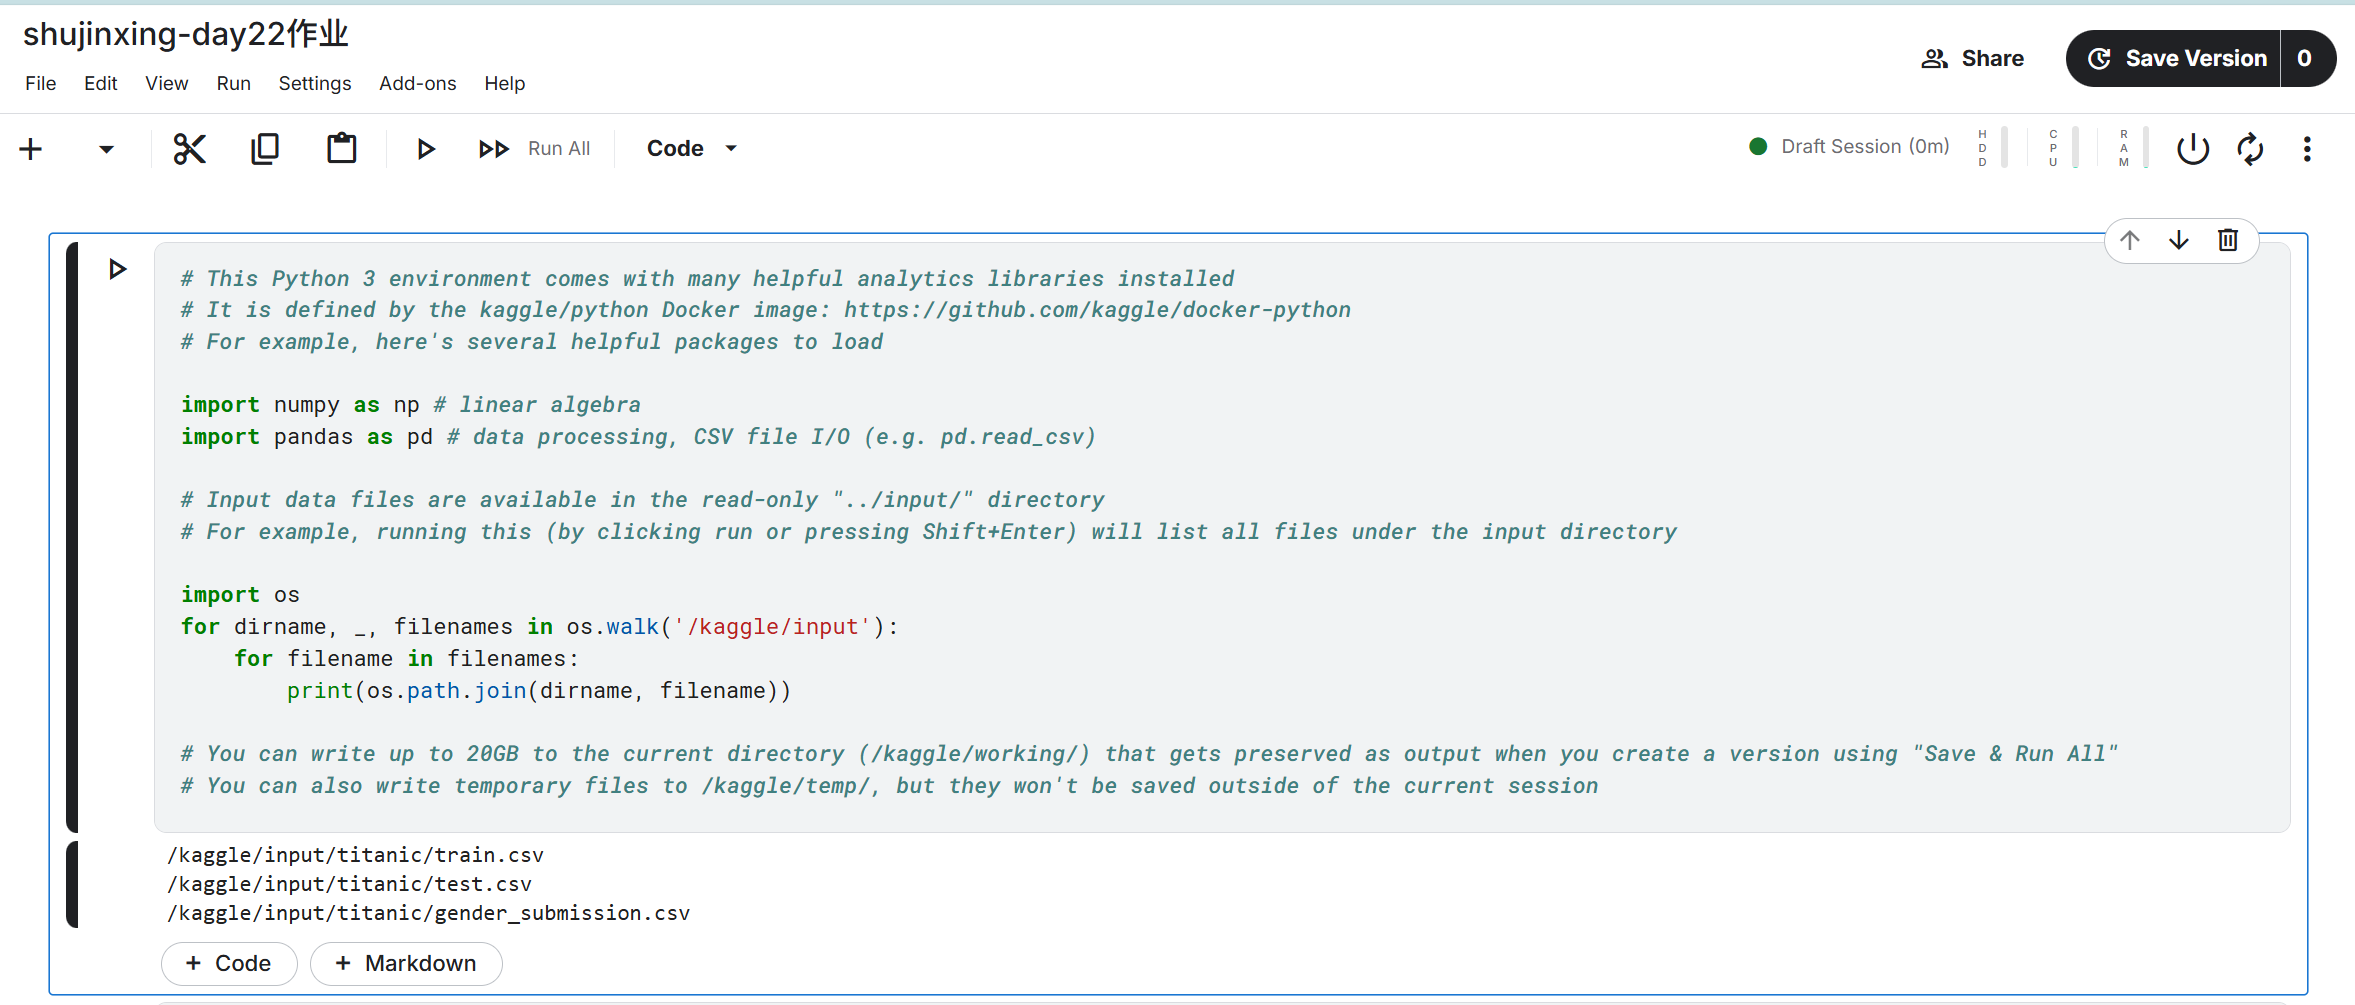

上图为kaggle平台代码提交的代码 理解下这个函数的遍历  以后如果这个训练营说到大模型相关，我们还会经常和os模块打交道